<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data

---

### Learning Objectives
 
**After this lesson, you will be able to:**
- Identify time series data.
- Explain the challenges of working with time series data.
- Use the `datetime` library to represent dates as objects.
- Preprocess time series data with Pandas.

---

### Lesson Guide

#### Time Series Data
- [What is a Time Series](#A)
- [The Datetime Library](#B)
- [Preprocessing Time Series Data with Pandas](#C)
- [Independent Practice](#D)
----

<h2><a id="A">What is a Time Series?</a></h2>

A **time series** is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

> **Check for Understanding:** List some examples of real-world time series data.

### Let's take a look at some Apple stock data to get a feel for what time series data look like.

In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

aapl = pd.read_csv("../../data/aapl.csv")

Take a high-level look at the data. What are we looking at?

In [2]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


In [3]:
aapl.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.155100,106.060518,104.392550,105.292191,3.674495e+07
std,7.905047,7.876708,7.995679,7.963102,1.609059e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,97.355000,98.220000,96.690000,97.340000,2.665144e+07
50%,106.270000,107.270000,105.500000,106.100000,3.229234e+07
75%,111.450000,112.370000,110.700000,111.750000,4.137394e+07
max,119.110000,119.930000,118.810000,119.750000,1.322245e+08


In [4]:
aapl['Date'].dtypes

dtype('O')

<h2><a id="B">The DateTime library</a></h2>

As time is important to time series data, we will need to interpret these data in the ways that humans interpret them (which is many ways). 

Python's `DateTime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own `datetime` series and objects.

In this lesson, we'll review these data types and learn a little more about each of them:

* `datetime` objects.
* `datetime` series.
* Timestamps.
* `timedelta()`.

### `datetime` Objects

Below, we'll load in the `DateTime` library, which we can use to create a `datetime` object by entering in the different components of the date as arguments.

In [ ]:
# The datetime library is something you should already have from Anaconda.
#from datetime import datetime

In [5]:
# Let's just set a random datetime — not the end of the world or anything.
lesson_date = datetime(2021, 5, 14, 2, 10 , 10, 650020)
lesson_date

datetime.datetime(2021, 5, 14, 2, 10, 10, 650020)

The components of the date are accessible via the object's attributes.

In [6]:
print("Micro-Second", lesson_date.microsecond)
print("Second", lesson_date.second)
print("Minute", lesson_date.minute)
print("Hour", lesson_date.hour)
print("Day", lesson_date.day)
print("Month",lesson_date.month)
print("Year", lesson_date.year)

Micro-Second 650020
Second 10
Minute 10
Hour 2
Day 14
Month 5
Year 2021


In [7]:
lesson_date.month

5

In [8]:
lesson_date.year

2021

### `timedelta()`

Suppose we want to add time to or subtract time from a date. Maybe we're using time as an index and want to get everything that happened a week before a specific observation.

We can use a `timedelta` object to shift a `datetime` object. Here's an example:

In [9]:
# Import timedelta() from the DateTime library.
#from datetime import timedelta

# Timedeltas represent time as an amount rather than as a fixed position.
offset = timedelta(days=1, hours=20)

# The timedelta() has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 72000
offset microseconds 0


`datetime`'s `.now()` function will give you the `datetime` object of this very moment.

In [10]:
now = datetime.now()
print("Like Right Now: ", now)

Like Right Now:  2022-03-01 16:50:51.829634


The current time is particularly useful when using `timedelta()`.

In [11]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2022-03-03 12:50:51.829634
Past:  2022-02-27 20:50:51.829634


*Note: The largest value a `timedelta()` can hold is days. For instance, you can't say you want your offset to be two years, 44 days, and 12 hours; you have to convert those years to days.*

You can read more about the `timedelta()` category [here](https://docs.python.org/2/library/datetime.html).

### Guided Practice: Apple Stock Data

We can practice using `datetime` functions and objects using Apple stock data.

In [12]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


The `Date` column starts off as an object.

In [13]:
# Notice that date is a string
aapl.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

## Preprocessing Time Series Data with Pandas

### Convert time data to a `datetime` object.

Overwrite the original `Date` column with one that's been converted to a `datetime` series.

In [14]:
aapl['Date'][0]

'13-Jan-17'

In [15]:
aapl['Date'] = pd.to_datetime(aapl['Date'])

We can see these changes reflected in the `Date` column structure.

In [16]:
aapl.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


We can also see that the `Date` object has changed. 

In [17]:
aapl.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### The `.dt` Attribute

Pandas' `datetime` columns have a `.dt` attribute that allows you to access attributes that are specific to dates. For example:

    aapl.Date.dt.day
    aapl.Date.dt.month
    aapl.Date.dt.year
    aapl.Date.dt.day_name()

And, there are many more!

In [18]:
aapl['dayname']=aapl['Date'].dt.day_name()
aapl[['Date','dayname']].head()

,Date,dayname
0,2017-01-13,Friday
1,2017-01-12,Thursday
2,2017-01-11,Wednesday
3,2017-01-10,Tuesday
4,2017-01-09,Monday


In [19]:
aapl['Dayofyear']=aapl['Date'].dt.dayofyear
aapl.head()

,Date,Open,High,Low,Close,Volume,dayname,Dayofyear
0,2017-01-13,119.11,119.62,118.81,119.04,26111948,Friday,13
1,2017-01-12,118.90,119.30,118.21,119.25,27086220,Thursday,12
2,2017-01-11,118.74,119.93,118.60,119.75,27588593,Wednesday,11
3,2017-01-10,118.77,119.38,118.30,119.11,24462051,Tuesday,10
4,2017-01-09,117.95,119.43,117.94,118.99,33561948,Monday,9


Check out the Pandas `.dt` [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html) for more information.

### Timestamps

Timestamps are useful objects for comparisons. You can create a timestamp object using the `pd.to_datetime()` function and a string specifying the date. These objects are especially helpful when you need to perform logical filtering with dates.

In [26]:
ts = pd.to_datetime('1/11/2017')
ts

Timestamp('2017-01-11 00:00:00')

In [21]:
type(aapl['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
type(ts)

pandas._libs.tslibs.timestamps.Timestamp

The main difference between a `datetime` object and a timestamp is that timestamps can be used as comparisons.

Let's use the timestamp `ts` as a comparison with our Apple stock data.

In [23]:
ts

Timestamp('2017-01-01 00:00:00')

In [27]:
aapl['Date'] >= ts

0       True
1       True
2       True
3      False
4      False
       ...  
246    False
247    False
248    False
249    False
250    False
Name: Date, Length: 251, dtype: bool

In [28]:
aapl.loc[aapl['Date'] >= ts, :].head()

,Date,Open,High,Low,Close,Volume,dayname,Dayofyear
0,2017-01-13,119.11,119.62,118.81,119.04,26111948,Friday,13
1,2017-01-12,118.90,119.30,118.21,119.25,27086220,Thursday,12
2,2017-01-11,118.74,119.93,118.60,119.75,27588593,Wednesday,11


We can even get the first and last dates from a time series.

In [29]:
aapl['Date'].describe()

/var/folders/6z/smv4kfs12fv5tpcrw97pcfd40000gn/T/ipykernel_13248/2488832155.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aapl['Date'].describe()


count                     251
unique                    251
top       2017-01-13 00:00:00
freq                        1
first     2016-01-19 00:00:00
last      2017-01-13 00:00:00
Name: Date, dtype: object

In [30]:
aapl['Date'].min()

Timestamp('2016-01-19 00:00:00')

In [31]:
aapl.Date.max() - aapl.Date.min()

Timedelta('360 days 00:00:00')

> **Check for Understanding:** Why do we convert the DataFrame column containing the time information into a `datetime` object?

### Set `datetime` to Index the DataFrame

After converting the column containing time data from object to `datetime`, it is also useful to make the index of the DataFrame a `datetime`.

In [32]:
aapl.head()

,Date,Open,High,Low,Close,Volume,dayname,Dayofyear
0,2017-01-13,119.11,119.62,118.81,119.04,26111948,Friday,13
1,2017-01-12,118.90,119.30,118.21,119.25,27086220,Thursday,12
2,2017-01-11,118.74,119.93,118.60,119.75,27588593,Wednesday,11
3,2017-01-10,118.77,119.38,118.30,119.11,24462051,Tuesday,10
4,2017-01-09,117.95,119.43,117.94,118.99,33561948,Monday,9


In [33]:
aapl.index

RangeIndex(start=0, stop=251, step=1)

Let's set the `Date` column as the index.

In [34]:
aapl.set_index('Date', inplace=True)

In [35]:
aapl.head()

,Open,High,Low,Close,Volume,dayname,Dayofyear
Date,,,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948,Friday,13
2017-01-12,118.90,119.30,118.21,119.25,27086220,Thursday,12
2017-01-11,118.74,119.93,118.60,119.75,27588593,Wednesday,11
2017-01-10,118.77,119.38,118.30,119.11,24462051,Tuesday,10
2017-01-09,117.95,119.43,117.94,118.99,33561948,Monday,9


In [36]:
aapl.loc['2017-01-11', 'Close']

Date
2017-01-11    119.75
Name: Close, dtype: float64

### Filtering by Date with Pandas

<AxesSubplot:xlabel='Date'>

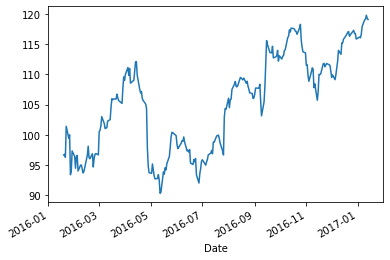

In [37]:
aapl['Close'].plot()

It is easy to filter by date using Pandas. Let's create a subset of data containing only the stock prices from 2017. We can specify the index as a string constant. 

In [40]:
aapl['2017']

/var/folders/6z/smv4kfs12fv5tpcrw97pcfd40000gn/T/ipykernel_13248/2924605042.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aapl['2017']


,Open,High,Low,Close,Volume,dayname,Dayofyear
Date,,,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948,Friday,13
2017-01-12,118.90,119.30,118.21,119.25,27086220,Thursday,12
2017-01-11,118.74,119.93,118.60,119.75,27588593,Wednesday,11
2017-01-10,118.77,119.38,118.30,119.11,24462051,Tuesday,10
2017-01-09,117.95,119.43,117.94,118.99,33561948,Monday,9
2017-01-06,116.78,118.16,116.47,117.91,31751900,Friday,6
2017-01-05,115.92,116.86,115.81,116.61,22193587,Thursday,5
2017-01-04,115.85,116.51,115.75,116.02,21118116,Wednesday,4
2017-01-03,115.80,116.33,114.76,116.15,28781865,Tuesday,3


There are a few things to note about indexing with time series. Unlike numeric indexing, the end index will be included. If you want to index with a range, the time indices must be sorted first.  

> **Recap:** The steps for preprocessing time series data are to:
* Convert time data to a `datetime` object.
* Set `datetime` to index the DataFrame.

# Recap

* We use time series analysis to identify changes in values over time.
* The `datetime` library makes working with time data more convenient.
* To preprocess time series data with Pandas, you:
    1. Convert the time column to a `datetime` object.
    2. Set the time column as the index of the DataFrame.

# Independent Practice

**Instructor Note**: These are optional and can be assigned as student practice questions outside of class.

### 1) Create a `datetime` object representing today's date.

In [ ]:
from datetime import datetime
from datetime import timedelta

# Time this lesson plan was written:
lesson_date = datetime(2018, 2, 25, 23, 31, 1, 844089)

In [ ]:
print(lesson_date)

### 2) Load the UFO data set from the internet.

In [41]:
import pandas as pd
from datetime import timedelta


ufo = pd.read_csv('http://bit.ly/uforeports')

In [42]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [43]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3) Convert the `Time` column to a `datetime` object.

In [44]:
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [45]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [46]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

### 4) Set the `Time` column to the index of the DataFrame.

In [47]:
ufo.set_index('Time', inplace=True)

In [53]:
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


### 5) Create a `timestamp` object for the date January 1, 1999.

In [55]:
ts = pd.to_datetime('1/1/1999')

### 6) Use the `timestamp` object to perform logical filtering on the DataFrame and create a subset of entries with a date above or equal to January 1, 1999.

In [56]:
mask1999=ufo.index >= ts

In [57]:
recent_ufos = ufo.loc[mask1999, 'State']

In [58]:
recent_ufos.head()

Time
1999-01-01 02:30:00    CA
1999-01-01 03:00:00    AR
1999-01-01 14:00:00    SC
1999-01-01 15:00:00    CA
1999-01-01 17:15:00    GA
Name: State, dtype: object